=== Sample Rows of Dataset ===
|   variance |   skewness |   kurtosis |   entropy |   label |
|-----------:|-----------:|-----------:|----------:|--------:|
|    3.6216  |     8.6661 |    -2.8073 |  -0.44699 |       0 |
|    4.5459  |     8.1674 |    -2.4586 |  -1.4621  |       0 |
|    3.866   |    -2.6383 |     1.9242 |   0.10645 |       0 |
|    3.4566  |     9.5228 |    -4.0112 |  -3.5944  |       0 |
|    0.32924 |    -4.4552 |     4.5718 |  -0.9888  |       0 |

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   label     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


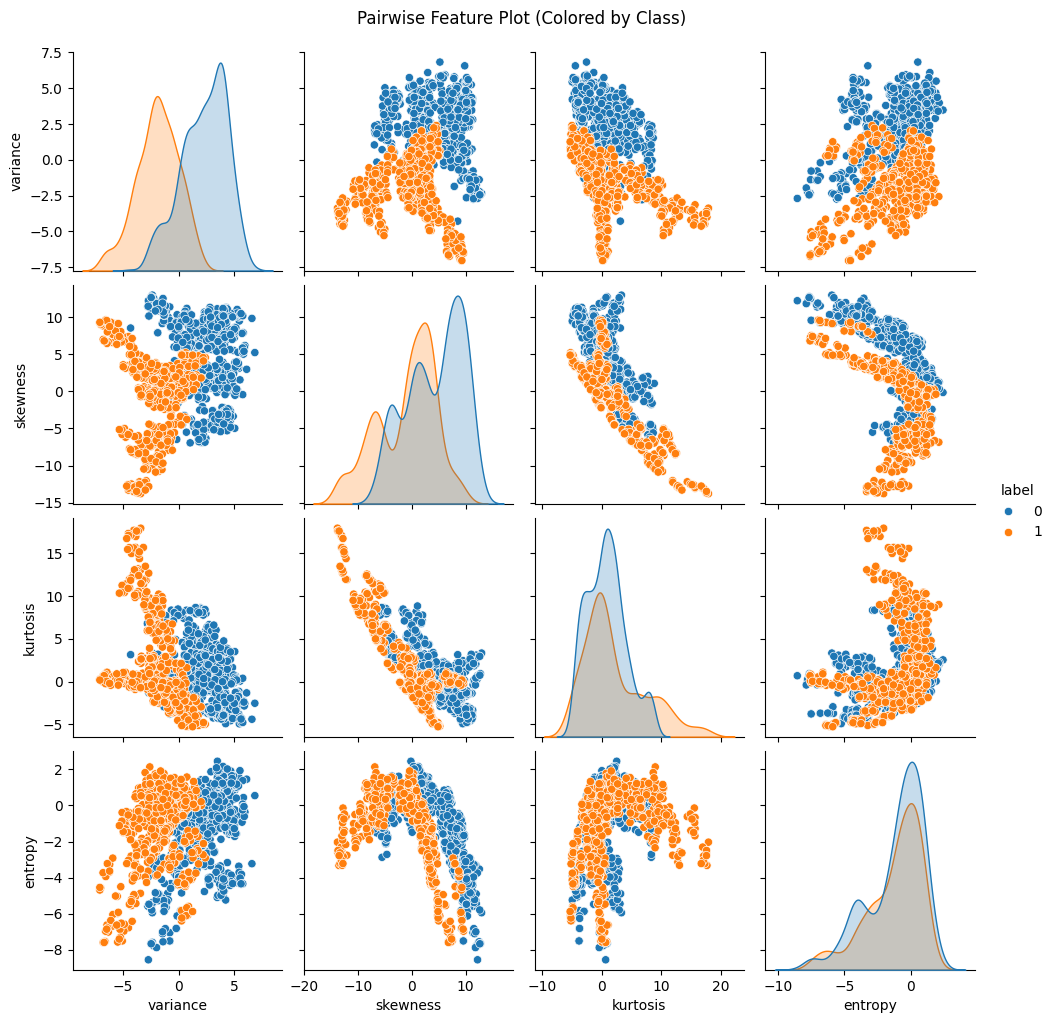

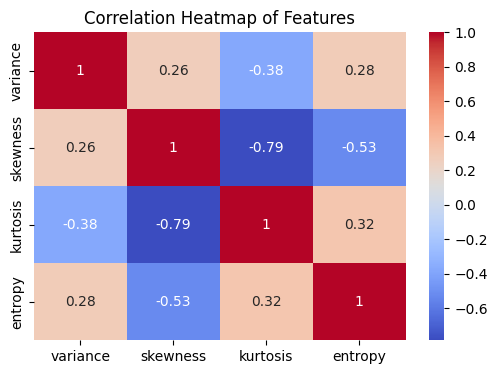


Train size: (1097, 4)  | Test size: (275, 4)

Trying: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Training accuracy = 1.0000
Testing  accuracy = 0.9855

Trying: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Training accuracy = 0.9854
Testing  accuracy = 0.9782

Trying: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}
Training accuracy = 0.9982
Testing  accuracy = 0.9782

=== Best Model Achieved 0.9855 Test Accuracy ===
Chosen Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 123, 'splitter': 'best'}

=== Classification Report (Best Model) ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       153
           1       0.99      0.98     

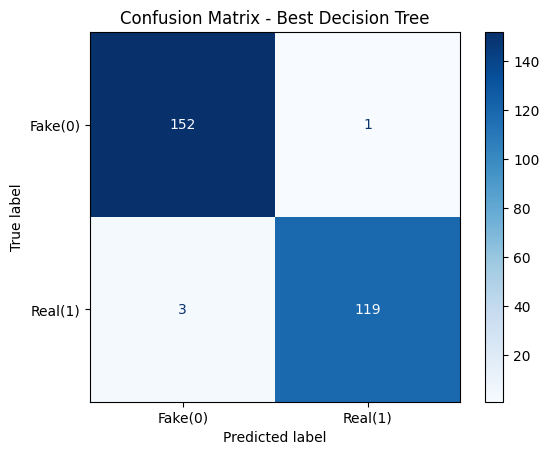

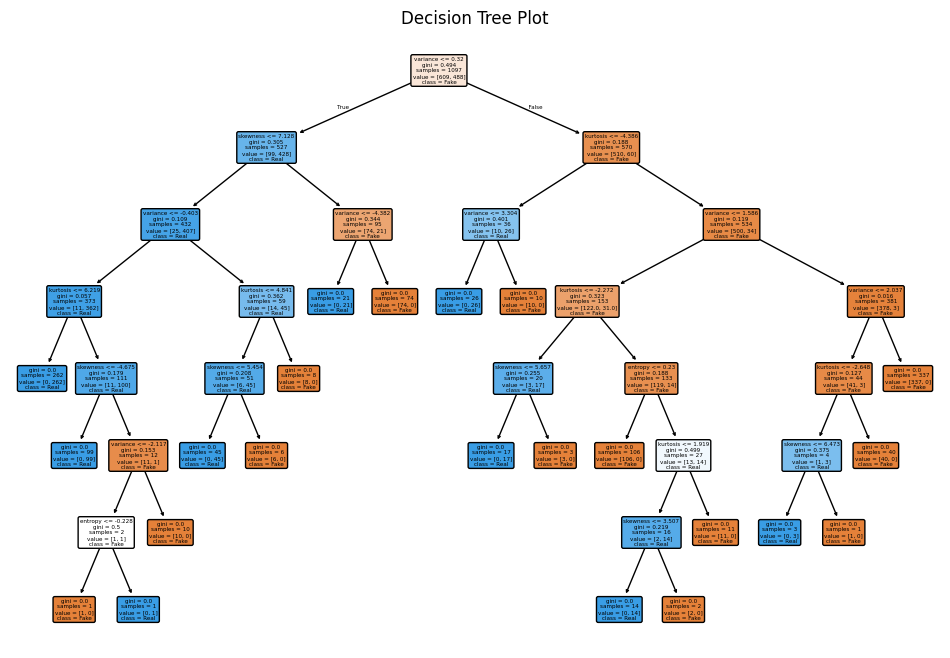


=== Feature Importances ===
variance   : 0.6177
skewness   : 0.2208
kurtosis   : 0.1383
entropy    : 0.0232


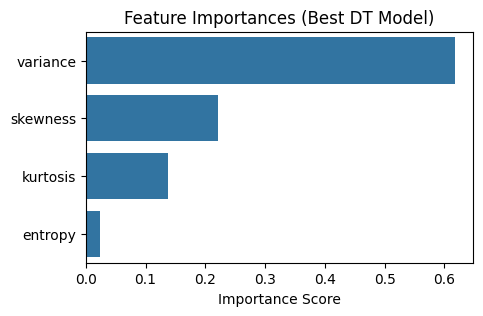

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
"""
- Variance: measures how spread out the pixel (or data) values are from the mean.
- Skewness: indicates the asymmetry of the data distribution.
- Kurtosis: signifies how heavy/long the tails are, relative to a normal distribution.
- Entropy : estimates the 'randomness' or complexity in the image wavelet domain.
"""

###########################################################
# 2) Load dataset
###########################################################
def load_banknote_data(path=None):
    if path:
        df_bank = pd.read_csv(path, names=["variance","skewness","kurtosis","entropy","label"])
    else:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
        df_bank = pd.read_csv(url, names=["variance","skewness","kurtosis","entropy","label"])
    return df_bank

df_bank = load_banknote_data()

# Show first few rows
print("=== Sample Rows of Dataset ===")
print(df_bank.head(5).to_markdown(index=False))

print("\n=== Data Info ===")
print(df_bank.info())

###########################################################
# 3) Visualization
###########################################################
sns.pairplot(
    df_bank,
    vars=["variance","skewness","kurtosis","entropy"],
    hue="label",
    diag_kind="kde"
)
plt.suptitle("Pairwise Feature Plot (Colored by Class)", y=1.02)
plt.show()

# Correlation heatmap
corr_matrix = df_bank.drop(columns="label").corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

###########################################################
# 4) Split data
###########################################################
X = df_bank[["variance","skewness","kurtosis","entropy"]]
y = df_bank["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=123,
    stratify=y
)

print("\nTrain size:", X_train.shape, " | Test size:", X_test.shape)

###########################################################
# 5) Try a few Decision Tree parameter combos
###########################################################
params_list = [
    {"criterion": "gini", "max_depth": None,     "min_samples_split": 2},
    {"criterion": "entropy","max_depth": 4,      "min_samples_split": 2},
    {"criterion": "entropy","max_depth": None,   "min_samples_split": 10},
]

best_tree = None
best_accuracy = -1

for params in params_list:
    print("\nTrying:", params)
    tree_model = DecisionTreeClassifier(
        criterion=params["criterion"],
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        random_state=123
    )
    tree_model.fit(X_train, y_train)

    train_acc = tree_model.score(X_train, y_train)
    test_acc  = tree_model.score(X_test,  y_test)
    print(f"Training accuracy = {train_acc:.4f}")
    print(f"Testing  accuracy = {test_acc:.4f}")

    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_tree = tree_model

print(f"\n=== Best Model Achieved {best_accuracy:.4f} Test Accuracy ===")
print("Chosen Hyperparameters:", best_tree.get_params())

###########################################################
# 6) Evaluate model
###########################################################
y_pred = best_tree.predict(X_test)
print("\n=== Classification Report (Best Model) ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

ConfusionMatrixDisplay(cm, display_labels=["Fake(0)","Real(1)"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Best Decision Tree")
plt.show()

###########################################################
# 7) Tree Visualization
###########################################################
plt.figure(figsize=(12,8))
plot_tree(
    best_tree,
    feature_names=["variance","skewness","kurtosis","entropy"],
    class_names=["Fake","Real"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Plot")
plt.show()

###########################################################
# 8) Feature Importances
###########################################################
feat_imps = best_tree.feature_importances_
feat_names = ["variance","skewness","kurtosis","entropy"]

print("\n=== Feature Importances ===")
for name, score in zip(feat_names, feat_imps):
    print(f"{name:<10} : {score:.4f}")

plt.figure(figsize=(5,3))
sns.barplot(x=feat_imps, y=feat_names)
plt.xlabel("Importance Score")
plt.title("Feature Importances (Best DT Model)")
plt.show()